In [3]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline

In [49]:
NSIDE = 16
n_pixels_count = hp.nside2npix(NSIDE)
pixels_count = hp.ma(np.zeros(n_pixels_count, dtype=np.double))

In [61]:
data = np.loadtxt('../data/auger/events_a8.dat')
dec = data[:,2]
ra = data[:,3]
events = hp.ang2pix(NSIDE, np.radians(90 - dec), np.radians(ra), False)
len(events)

32187

In [63]:
for i in range(n_pixels_count):
    ii = events==i
    n_inside = np.count_nonzero(ii)
    pixels_count[i] = n_inside
ii = pixels_mock>0
mean_pixels = np.mean(pixels_count[ii])
std_pixels = np.std(pixels_count[ii])
print('mean ', mean_pixels)
print('std', std_pixels)
pixels_count[ii] = (pixels_count[ii] - mean_pixels)/std_pixels

mean  12.5436477007
std 7.09831337639


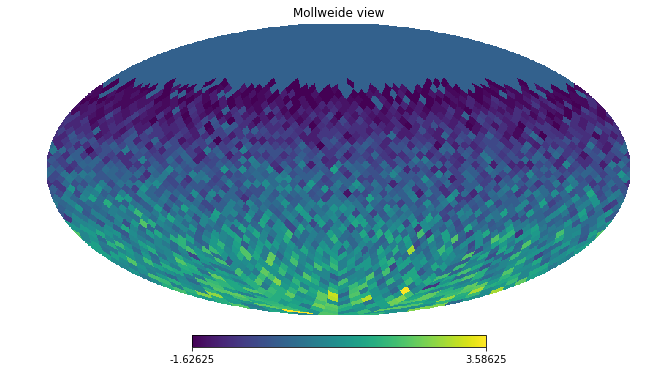

In [64]:
hp.mollview(pixels_count)


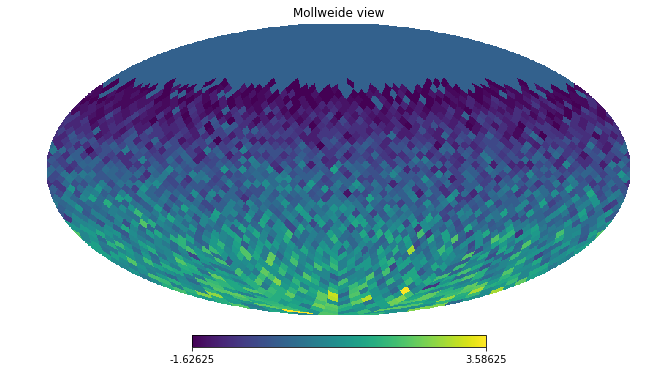